# Análisis Idealista Barcelona

### Importar pandas y numpy y leer el csv:

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("../datos/Barcelona_Idealista.csv", index_col=0)

df.head()

,city,district,neighborhood,condition,type,rooms,area_m2,lift,views,floor,prices
0,Barcelona,Eixample,la Dreta de l'Eixample,good condition,Flat,3,351,Yes,exterior,floor 1,2300000
1,Barcelona,Sarrià-Sant Gervasi,Sant Gervasi - Galvany,good condition,Flat,5,298,Yes,exterior,floor 3,1750000
2,Barcelona,Eixample,Sant Antoni,good condition,Penthouse,2,90,Yes,exterior,floor 7,590000
3,Barcelona,Eixample,la Dreta de l'Eixample,good condition,Flat,2,130,Yes,exterior,floor 1,450000
4,Barcelona,Horta-Guinardó,Can Baró,good condition,Terraced,3,110,No,exterior,Multiple,430000


### Borrar columnas innecesarias:

In [3]:
eliminar = ["city"]

df = df.drop(eliminar, axis = 1)

df.head()

,district,neighborhood,condition,type,rooms,area_m2,lift,views,floor,prices
0,Eixample,la Dreta de l'Eixample,good condition,Flat,3,351,Yes,exterior,floor 1,2300000
1,Sarrià-Sant Gervasi,Sant Gervasi - Galvany,good condition,Flat,5,298,Yes,exterior,floor 3,1750000
2,Eixample,Sant Antoni,good condition,Penthouse,2,90,Yes,exterior,floor 7,590000
3,Eixample,la Dreta de l'Eixample,good condition,Flat,2,130,Yes,exterior,floor 1,450000
4,Horta-Guinardó,Can Baró,good condition,Terraced,3,110,No,exterior,Multiple,430000


### Análisis exploratorio básico:

In [4]:
df.dtypes

district        object
neighborhood    object
condition       object
type            object
rooms            int64
area_m2          int64
lift            object
views           object
floor           object
prices           int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3265 entries, 0 to 3264
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   district      3265 non-null   object
 1   neighborhood  3265 non-null   object
 2   condition     3265 non-null   object
 3   type          3265 non-null   object
 4   rooms         3265 non-null   int64 
 5   area_m2       3265 non-null   int64 
 6   lift          3265 non-null   object
 7   views         3265 non-null   object
 8   floor         3265 non-null   object
 9   prices        3265 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 280.6+ KB


In [6]:
df.shape

(3265, 10)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rooms,3265.0,3.160796,1.325257,1.0,2.0,3.0,4.0,13.0
area_m2,3265.0,121.566616,92.721515,20.0,72.0,93.0,135.0,900.0
prices,3265.0,600419.972129,652266.142930,49000.0,279900.0,419000.0,655000.0,12000000.0


In [8]:
df.describe(include = "object").T

,count,unique,top,freq
district,3265,10,Eixample,788
neighborhood,3265,65,la Dreta de l'Eixample,241
condition,3265,3,good condition,1355
type,3265,8,Flat,2751
lift,3265,2,Yes,2727
views,3265,2,exterior,3098
floor,3265,20,floor 1,681


In [9]:
df.isnull().sum()

district        0
neighborhood    0
condition       0
type            0
rooms           0
area_m2         0
lift            0
views           0
floor           0
prices          0
dtype: int64

### Pregunta 1: ¿Cuál es el distrito que, de media, tiene los precios más altos? ¿Y los más bajos? ¿Y el barrio?

In [10]:
# Distrito con la media de precio más alta:

distritos_media = df.groupby(["district"])["prices"].mean()
distritos_media.nlargest(1)

district
Sarrià-Sant Gervasi    1.062997e+06
Name: prices, dtype: float64

In [11]:
# Distrito con la media de precio más baja:

distritos_media = df.groupby(["district"])["prices"].mean()
distritos_media.nsmallest(1)

district
Nou Barris    213070.182692
Name: prices, dtype: float64

In [12]:
# Barrio con la media de precio más alta:

barrios_media = df.groupby(["neighborhood"])["prices"].mean()
barrios_media.nlargest(1)

neighborhood
Pedralbes    1.604987e+06
Name: prices, dtype: float64

In [13]:
# Barrio con la media de precio más baja:

barrios_media = df.groupby(["neighborhood"])["prices"].mean()
barrios_media.nsmallest(1)

neighborhood
la Trinitat Nova    123389.9
Name: prices, dtype: float64

### Pregunta 2: ¿Cuál es la media de m2 y de habitaciones en el distrito más caro? ¿Y en el más barato?

In [14]:
# Media de m2 y de habitaciones en el distrito más caro:

espacio_media = df.groupby(["district"])["area_m2", "rooms"].mean()
espacio_media.loc["Sarrià-Sant Gervasi", ["area_m2", "rooms"]]

C:\Users\Pau\AppData\Local\Temp\ipykernel_14168\4104685862.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  espacio_media = df.groupby(["district"])["area_m2", "rooms"].mean()


area_m2    194.695568
rooms        3.980732
Name: Sarrià-Sant Gervasi, dtype: float64

In [15]:
# Media de m2 y de habitaciones en el distrito más barato:

espacio_media = df.groupby(["district"])["area_m2", "rooms"].mean()
espacio_media.loc["Nou Barris", ["area_m2", "rooms"]]

C:\Users\Pau\AppData\Local\Temp\ipykernel_14168\1606022333.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  espacio_media = df.groupby(["district"])["area_m2", "rooms"].mean()


area_m2    71.048077
rooms       2.682692
Name: Nou Barris, dtype: float64

### Pregunta 3: ¿Qué precio tiene el piso más caro? ¿Y el más barato? ¿Cuál es la diferencia de precio entre ellos?

In [16]:
df["prices"].max()

12000000

In [17]:
df["prices"].min()

49000

In [18]:
diferencia = df["prices"].max() - df["prices"].min()
diferencia

11951000

### Datos y pruebas random

In [19]:
# ¿En qué planta suelen estar los pisos?

df["floor"].value_counts()

 floor 1        681
 floor 2        588
 floor 3        452
 floor 4        385
 floor 5        259
ground floor    236
 floor 6        160
mezzanine       146
Multiple        144
 floor 7         86
 floor 8         66
 floor 9         27
 floor 10        16
 floor 14         7
 floor 11         3
 floor 12         3
 floor 25         2
 floor 16         2
 floor 19         1
 floor 21         1
Name: floor, dtype: int64

In [20]:
# ¿Cuál es el precio medio por planta?

media_planta = df.groupby(["floor"])["prices"].mean()
media_planta.sort_values(ascending = False)

floor
 floor 21       2.500000e+06
 floor 19       1.950000e+06
Multiple        1.697267e+06
 floor 25       1.090000e+06
 floor 9        1.076848e+06
 floor 14       9.327857e+05
 floor 11       8.533333e+05
 floor 10       7.929062e+05
 floor 7        7.122756e+05
 floor 8        6.827879e+05
 floor 6        6.658453e+05
 floor 5        6.324900e+05
 floor 4        5.899445e+05
 floor 1        5.129572e+05
mezzanine       5.044304e+05
 floor 3        4.985168e+05
ground floor    4.934839e+05
 floor 2        4.904492e+05
 floor 16       3.750000e+05
 floor 12       2.629333e+05
Name: prices, dtype: float64

In [21]:
# Crear columna con el precio por metro cuadrado:

df["price_m2"] = df["prices"] / df["area_m2"]

df["price_m2"] = df["price_m2"].astype('int')

df.head()

,district,neighborhood,condition,type,rooms,area_m2,lift,views,floor,prices,price_m2
0,Eixample,la Dreta de l'Eixample,good condition,Flat,3,351,Yes,exterior,floor 1,2300000,6552
1,Sarrià-Sant Gervasi,Sant Gervasi - Galvany,good condition,Flat,5,298,Yes,exterior,floor 3,1750000,5872
2,Eixample,Sant Antoni,good condition,Penthouse,2,90,Yes,exterior,floor 7,590000,6555
3,Eixample,la Dreta de l'Eixample,good condition,Flat,2,130,Yes,exterior,floor 1,450000,3461
4,Horta-Guinardó,Can Baró,good condition,Terraced,3,110,No,exterior,Multiple,430000,3909


In [26]:
# Crear columna con coordenadas (no la ejecuto ya que tarda mucho en procesar):

from geopy.geocoders import Nominatim

def sacar_coordenadas(distrito):
    geoloca = Nominatim(user_agent= "pau")
    localizacion = geoloca.geocode(distrito)
    
    return localizacion.latitude, localizacion.longitude

distritos_unicos = df["district"]

df["coordenadas distrito"] = df["district"].unique().apply(sacar_coordenadas)

df.head()

AttributeError: 'numpy.ndarray' object has no attribute 'apply'

In [1]:
# Ampliar la columna de coordenadas y crear dos nuevas: lat y long (no la ejecuto ya que tarda mucho en procesar):

df[["lat", "long"]] = df.apply(lambda d: sacar_coordenadas(d["district".unique()]), axis = 1, result_type = "expand")

df.head()

NameError: name 'df' is not defined

In [22]:
# Hacer un merge a partir de un diccionari que contiene el número total de crímenes de cada distrito en 2019:

crimen_distritos = {"Ciutat Vella": 50436, "Eixample": 59552, "Sants-Montjuïc": 25658, "Les Corts": 8627, "Sarrià-Sant Gervasi": 11118, "Gràcia": 9722, "Horta-Guinardó": 9996, "Nou Barris": 9226, "Sant Andreu": 12017, "Sant Martí": 27481}

df_crimen_distritos = pd.DataFrame(crimen_distritos.items(), columns=['district', 'num_crimenes_2019_distrito'])

df_mergeado = df.merge(df_crimen_distritos, on='district')

df_mergeado.sample(10)

,district,neighborhood,condition,type,rooms,area_m2,lift,views,floor,prices,price_m2,num_crimenes_2019_distrito
1451,Horta-Guinardó,el Baix Guinardó,needs refurb,Flat,5,124,Yes,exterior,floor 3,375000,3024,9996
1838,Ciutat Vella,el Raval,good condition,Flat,1,60,Yes,interior,floor 1,339000,5650,50436
57,Eixample,l'Antiga Esquerra de l'Eixample,good condition,Flat,2,132,Yes,exterior,mezzanine,599000,4537,59552
1569,Les Corts,Pedralbes,good condition,Semi-detached,4,185,No,exterior,Multiple,860000,4648,8627
3218,Nou Barris,Vilapicina i la Torre Llobeta,new,Flat,2,55,Yes,exterior,floor 2,260000,4727,9226
1764,Les Corts,la Maternitat i Sant Ramon,needs refurb,Flat,3,79,Yes,exterior,floor 2,279000,3531,8627
763,Eixample,la Nova Esquerra de l'Eixample,needs refurb,Flat,5,162,Yes,exterior,floor 9,752000,4641,59552
2015,Ciutat Vella,el Raval,needs refurb,Flat,4,85,No,exterior,floor 2,283000,3329,50436
1708,Les Corts,Pedralbes,needs refurb,Flat,7,250,Yes,exterior,floor 3,1250000,5000,8627
1572,Les Corts,la Maternitat i Sant Ramon,good condition,Flat,2,48,Yes,exterior,floor 6,199000,4145,8627


### Probando con visualización

In [23]:
df.head()

,district,neighborhood,condition,type,rooms,area_m2,lift,views,floor,prices,price_m2
0,Eixample,la Dreta de l'Eixample,good condition,Flat,3,351,Yes,exterior,floor 1,2300000,6552
1,Sarrià-Sant Gervasi,Sant Gervasi - Galvany,good condition,Flat,5,298,Yes,exterior,floor 3,1750000,5872
2,Eixample,Sant Antoni,good condition,Penthouse,2,90,Yes,exterior,floor 7,590000,6555
3,Eixample,la Dreta de l'Eixample,good condition,Flat,2,130,Yes,exterior,floor 1,450000,3461
4,Horta-Guinardó,Can Baró,good condition,Terraced,3,110,No,exterior,Multiple,430000,3909


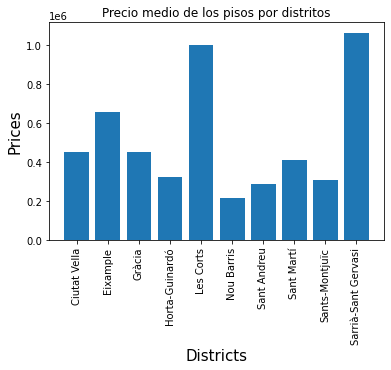

In [76]:
import matplotlib.pyplot as plt

keys = [distrito for distrito, df in df.groupby(['district'])]

plt.bar(keys, df.groupby(['district']).mean()['prices'])
plt.title("Precio medio de los pisos por distritos")
plt.ylabel('Prices', size=15)
plt.xlabel('Districts', size=15)
plt.xticks(keys, rotation='vertical', size=10)
plt.show()

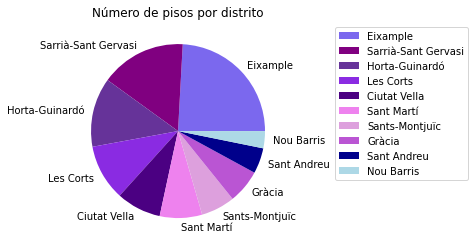

In [63]:
colores = ['mediumslateblue', 'purple', 'rebeccapurple', 'blueviolet','indigo', 'violet', 'plum', 'mediumorchid', 'darkblue', 'lightblue'] 

plt.pie(df["district"].value_counts(), 
        labels = df["district"].unique(), 
        colors = colores)

plt.title("Número de pisos por distrito")
plt.legend(bbox_to_anchor=(1.2, 1))
plt.show()

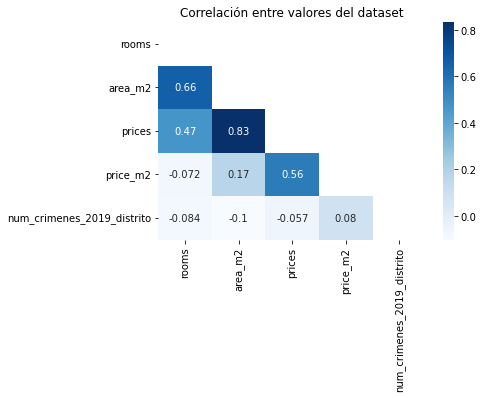

In [75]:
df_mergeado.corr()

import seaborn as sns

mask = np.triu(np.ones_like(df_mergeado.corr(), dtype=bool))

sns.heatmap(df_mergeado.corr(),
            cmap = "Blues",
            mask = mask,
           annot = True).set_title("Correlación entre valores del dataset");

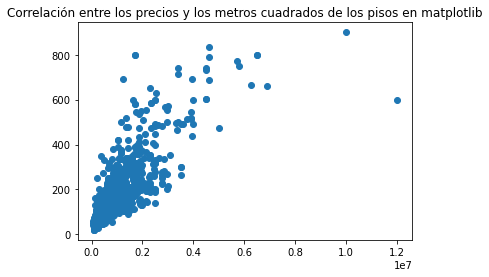

In [88]:
plt.scatter(df_mergeado['prices'], df_mergeado['area_m2'])

plt.title("Correlación entre los precios y los metros cuadrados de los pisos en matplotlib")
plt.show()

C:\Users\Pau\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


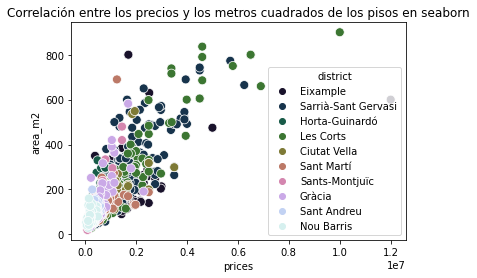

In [95]:
sns.scatterplot('prices', 'area_m2', data = df_mergeado ,
                hue = 'district',
                s = 80,
               palette = "cubehelix").set_title("Correlación entre los precios y los metros cuadrados de los pisos en seaborn")

plt.show()

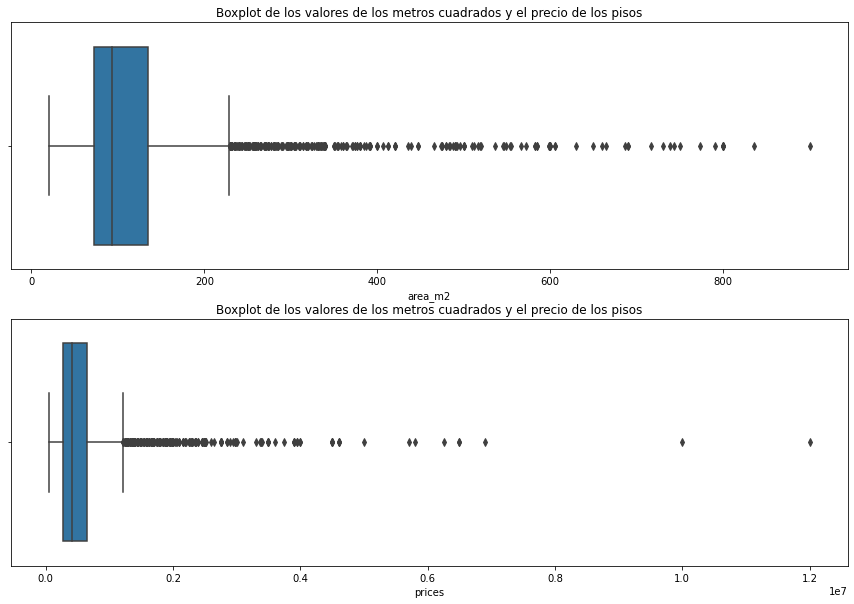

In [80]:
columnas = ["area_m2", "prices"]

fig, ax = plt.subplots(2, 1, figsize=(15,10))

for i in range(len(columnas)):
    sns.boxplot(x=columnas[i], data=df, ax=ax[i]).set_title("Boxplot de los valores de los metros cuadrados y el precio de los pisos")
plt.show()